In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_gesture_distribution(csv_path):
    # Load CSV file without header and assume first column contains gesture names.
    df = pd.read_csv(csv_path, header=None)
    
    # Calculate the count of each gesture class
    gesture_counts = df[0].value_counts().reset_index()
    gesture_counts.columns = ['Gesture', 'Count']
    
    # Set a visually pleasing seaborn style and context for better readability.
    sns.set(style="whitegrid", palette="deep", font_scale=1.2)
    
    # Create a figure with a defined size
    plt.figure(figsize=(10, 5))
    
    # Create a bar plot showing the distribution of gestures
    ax = sns.barplot(x='Gesture', y='Count', data=gesture_counts, order=gesture_counts['Gesture'])
    
    # Customize plot title and axis labels
    plt.title("Gesture Distribution", fontsize=18, weight='bold')
    plt.xlabel("Gesture Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    
    # Rotate x-tick labels for clarity if there are many gestures
    plt.xticks(rotation=45, ha='right')
    
    # Annotate each bar with its count value for better visualization
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 8), textcoords='offset points',
                    fontsize=12, color='black', weight='bold')
    
    # Adjust layout for a tight fit and show the plot
    plt.tight_layout()
    plt.show()


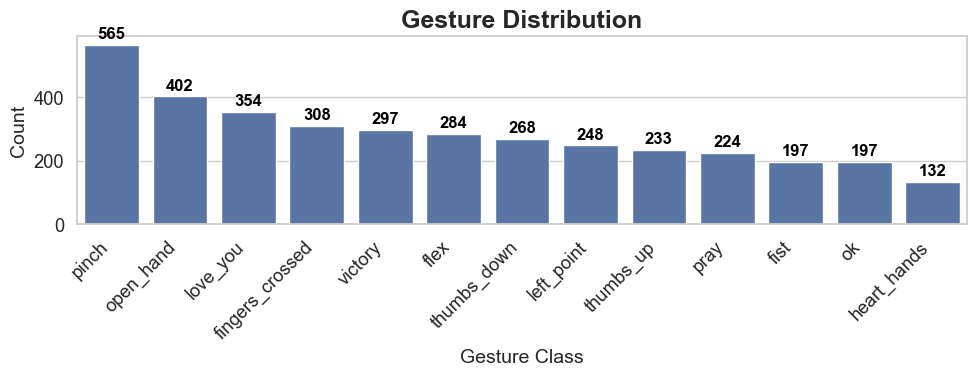

In [9]:
visualize_gesture_distribution("keypoint.csv")

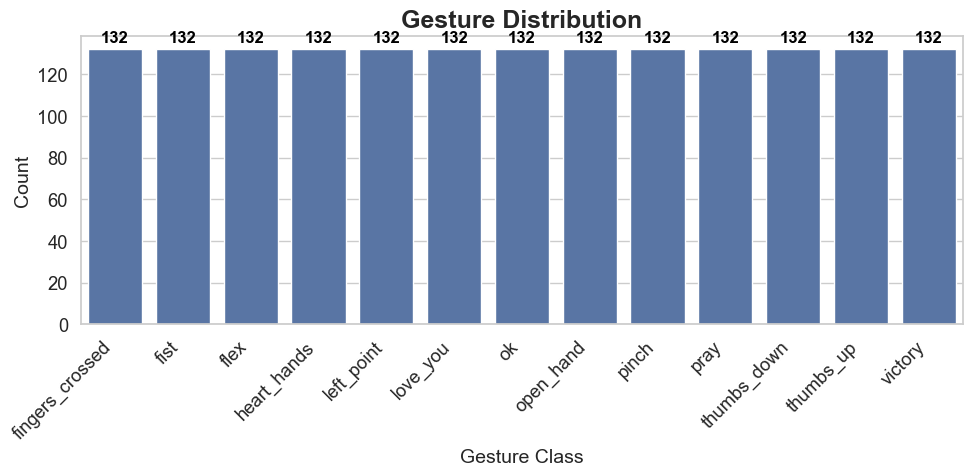

In [11]:
visualize_gesture_distribution("normalized_cut_names.csv")

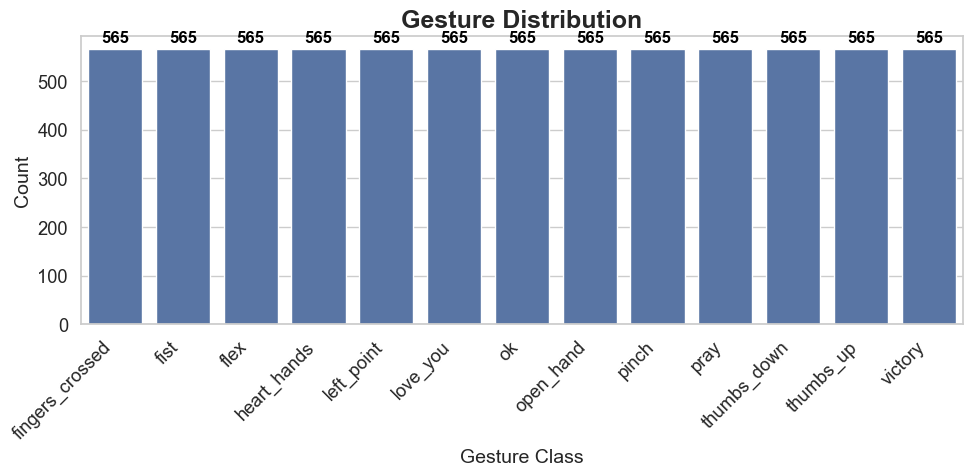

In [12]:
visualize_gesture_distribution("normalized_upscale_names.csv")

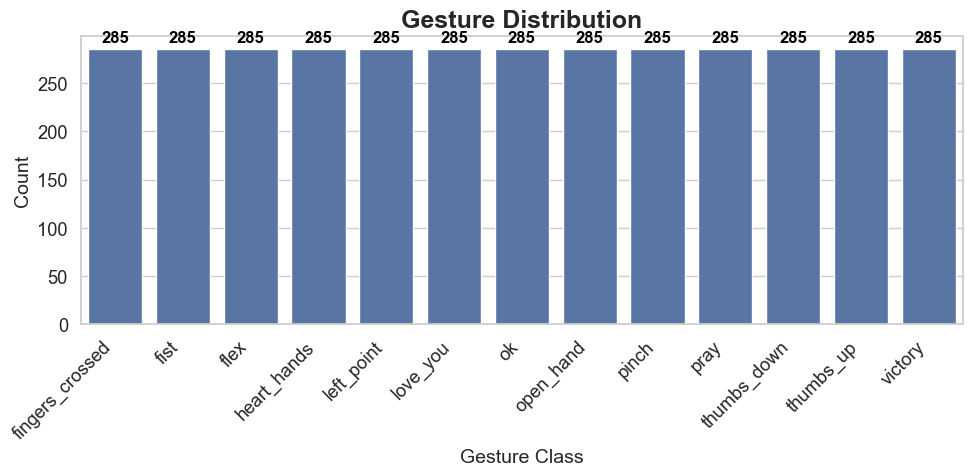

In [13]:
visualize_gesture_distribution("normalized_mean_names.csv")

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_comparative_gesture_distribution_separate(original_csv, cutted_csv, upscaled_csv, mean_csv):
    # Load datasets without headers
    df_orig = pd.read_csv(original_csv, header=None)
    df_cutted = pd.read_csv(cutted_csv, header=None)
    df_upscaled = pd.read_csv(upscaled_csv, header=None)
    df_mean = pd.read_csv(mean_csv, header=None)
    
    # Compute counts for each gesture class in the original dataset
    orig_counts = df_orig[0].value_counts().reset_index()
    orig_counts.columns = ['Gesture', 'Count']
    orig_counts['Dataset'] = 'Original'
    
    # Function to compute counts from a dataset and assign a label
    def get_counts(df, label):
        counts = df[0].value_counts().reset_index()
        counts.columns = ['Gesture', 'Count']
        counts['Dataset'] = label
        return counts
    
    # Compute counts for advanced datasets
    cutted_counts = get_counts(df_cutted, 'Cutted')
    upscaled_counts = get_counts(df_upscaled, 'Upscaled')
    mean_counts = get_counts(df_mean, 'Mean')
    
    # Function to merge original counts with an advanced dataset's counts
    def merge_counts(adv_counts):
        merged = pd.merge(orig_counts, adv_counts, on='Gesture', how='outer', suffixes=('_orig', '_adv'))
        merged['Count_orig'] = merged['Count_orig'].fillna(0)
        merged['Count_adv'] = merged['Count_adv'].fillna(0)
        long_df = pd.melt(merged, id_vars='Gesture', value_vars=['Count_orig', 'Count_adv'],
                          var_name='Dataset', value_name='Count')
        # Replace column names with proper dataset labels
        long_df['Dataset'] = long_df['Dataset'].replace({'Count_orig': 'Original', 'Count_adv': adv_counts['Dataset'].iloc[0]})
        return long_df
    
    # Define a function to plot the comparison
    def plot_comparison(data, title, adv_label):
        sns.set(style="whitegrid", font_scale=1.2)
        plt.figure(figsize=(10, 5))
        # Define palette: blue for original and orange for the advanced dataset
        palette = {"Original": "dodgerblue", adv_label: "darkorange"}
        ax = sns.barplot(data=data, x='Gesture', y='Count', hue='Dataset', palette=palette)
        plt.title(title, fontsize=18, weight='bold')
        plt.xlabel("Gesture", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(rotation=45, ha='right')
        
        # Annotate bars with their counts
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 8), textcoords='offset points',
                        fontsize=12, color='black', weight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # Merge counts and plot for each advanced dataset
    data_cutted = merge_counts(cutted_counts)
    plot_comparison(data_cutted, "Original vs Cutted Gesture Distribution", "Cutted")
    
    data_upscaled = merge_counts(upscaled_counts)
    plot_comparison(data_upscaled, "Original vs Upscaled Gesture Distribution", "Upscaled")
    
    data_mean = merge_counts(mean_counts)
    plot_comparison(data_mean, "Original vs Mean Gesture Distribution", "Mean")

# Example usage:
# visualize_comparative_gesture_distribution_separate("original.csv", "cutted.csv", "upscaled.csv", "mean.csv")


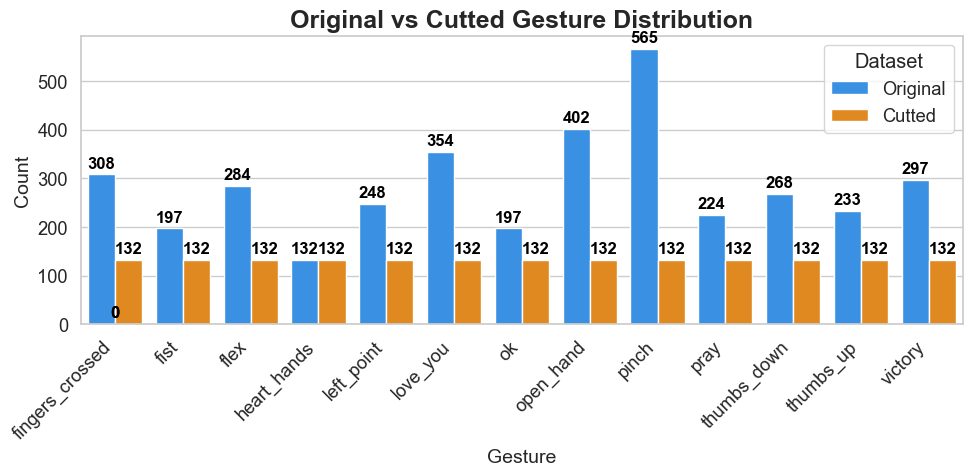

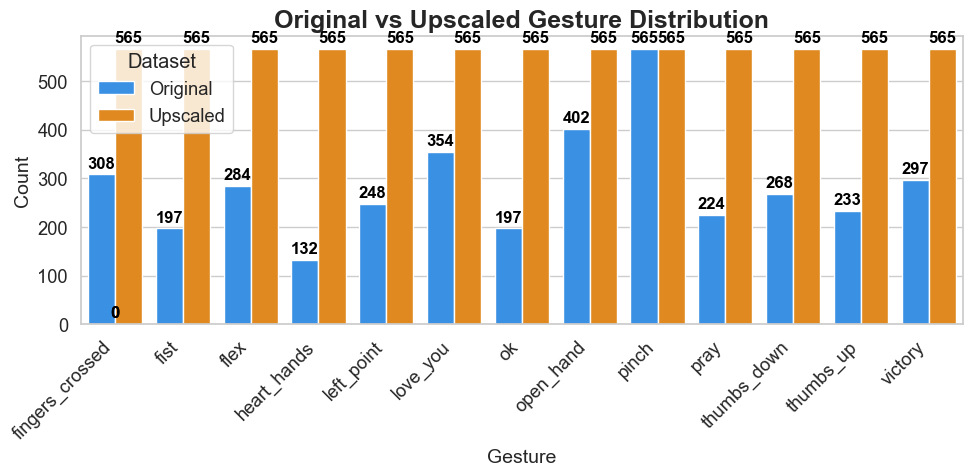

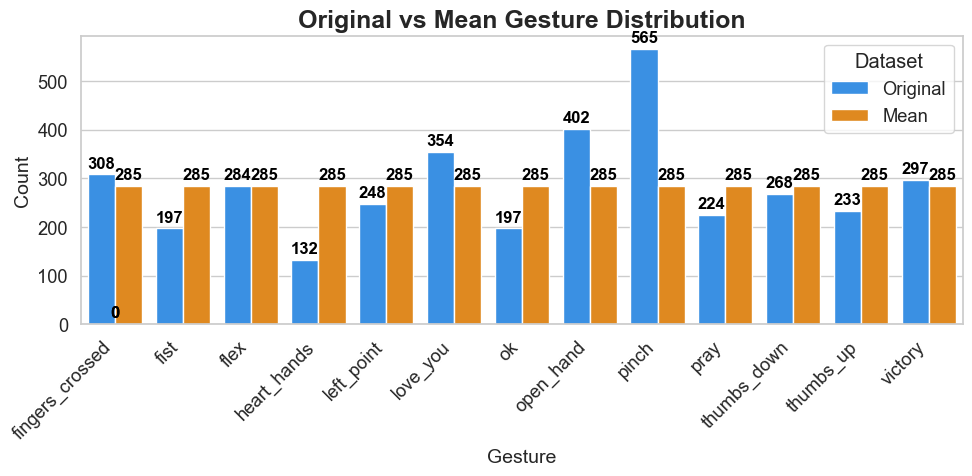

In [23]:
visualize_comparative_gesture_distribution_separate("keypoint.csv", "normalized_cut_names.csv", "normalized_upscale_names.csv", "normalized_mean_names.csv")
